In [1]:
from sklearn.datasets import load_boston

In [2]:
data = load_boston()

In [3]:
x , y = data['data'], data['target']

In [4]:
from matplotlib import pyplot as plt 

In [5]:
def draw_rm_and_price():
    plt.scatter(x[:,5],y)

In [6]:
import random

In [7]:
def price(rm, k, b):
    return k*rm+b

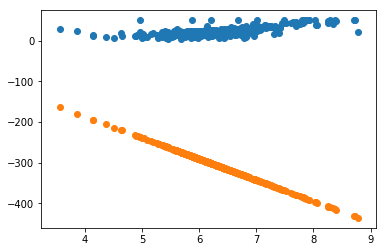

In [9]:
k = random.randint(-100,100)
b = random.randint(-100,100)
x_rm = x[:,5]
y_rm = [price(r,k,b) for r in x_rm]
draw_rm_and_price()
plt.scatter(x_rm,y_rm)

In [10]:
def loss(y , y_hat):
    return sum((y_i - y_hat_i)**2 for y_i,y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

In [11]:
def loss_abs(y , y_hat):
    return sum(abs(y_i - y_hat_i) for y_i,y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

In [11]:
loss_abs(data['target'],y_rm)

218.77964426877452

In [12]:
loss(data['target'],y_rm)**0.5

221.15689910639406

In [13]:
def partial_k(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient

In [14]:
def partial_b(y, y_hat):
    n = len(y)
    
    grandient_b = 0 
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        grandient_b += (y_i - y_hat_i) 
    return -2 / n* grandient_b

In [15]:
partial_k(x_rm, y , [price(r, k, b) for r in x_rm])

-2794.343337913046

In [16]:
partial_b(y , [price(r, k, b) for r in x_rm])

-437.55928853754904

In [17]:
x, y = data['data'], data['target']
x_rm = x[:,5]
trying_times = 2000

min_loss = float('inf')

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100
 
learning_rate = 1e-02



for i in range(trying_times):
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in x_rm]
     
    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss: # performance became better
        
        min_loss = current_loss
        if i%50==0:
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, current_k, current_b, min_loss))
    
    k_gradient = partial_k(x_rm, y, price_by_k_and_b)
    
    b_gradient = partial_b(y, price_by_k_and_b)
        
    current_k = current_k + (-1 * k_gradient)*learning_rate
    current_b = current_b + (-1 * b_gradient)*learning_rate


When time is : 0, get best_k: -6.117613688971147 best_b: -49.83177374641965, and the loss is: 12436.927051332163
When time is : 50, get best_k: 11.037562678330367 best_b: -46.98227014628111, and the loss is: 45.46809172816186
When time is : 100, get best_k: 11.014428109325008 best_b: -46.83510842273494, and the loss is: 45.42371296779936
When time is : 150, get best_k: 10.991570068910264 best_b: -46.689705730186716, and the loss is: 45.38038878962351
When time is : 200, get best_k: 10.968985251726885 best_b: -46.5460410428562, and the loss is: 45.33809413336714
When time is : 250, get best_k: 10.94667039192475 best_b: -46.404093586285356, and the loss is: 45.29680453427562
When time is : 300, get best_k: 10.92462226269059 best_b: -46.263842834334206, and the loss is: 45.25649610895591
When time is : 350, get best_k: 10.902837675781399 best_b: -46.125268506212706, and the loss is: 45.21714554156108
When time is : 400, get best_k: 10.881313481063378 best_b: -45.988350563548046, and the l

 $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$
 有点不会了....

In [22]:
def partial_k_abs(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_i - y_hat_i > 0:
            
        gradient += (y_i - y_hat_i) * x_i
    
    return 1 / n * gradient

IndentationError: expected an indented block (<ipython-input-22-0c6988b850be>, line 9)

In [21]:
def partial_b_abs(y, y_hat):
    n = len(y)
    
    grandient_b = 0 
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        grandient_b += (y_i - y_hat_i) 
    return -2 / n* grandient_b

In [23]:
original_price = {1,5,8,9,10,17,18,20,24,30}

In [24]:
from collections import defaultdict
price = defaultdict(int)


In [25]:
for i,p in enumerate(original_price):
    price[i+1] = p

In [26]:
price

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 18,
             8: 20,
             9: 24,
             10: 30})

In [27]:
price[10]

30

In [28]:
from functools import wraps

called_time = defaultdict(int)

def get_call_time(f):
    
    @wraps(f)
    def wrap (n):
        result = f(n)
        called_time[(f.__name__,n)] += 1
        return result
    return wrap
        

In [29]:
def memo(f):
    already_computed = {}
    def _wrap(arg):
        result = None 
        if arg in already_computed:
            result = already_computed[arg]
        else:
            result = f(arg)
            already_computed[arg] = result
        return result
    return _wrap

In [30]:
# called_time = defaultdict(int)
@memo
@get_call_time
def r(n):
#     fname = r.__name__
    
#     called_time[(fname , n)] += 1
    
    return max(
        [price[n]] + [r(i) + r(n-i) for i in range(1,n)]
    )

In [31]:
r(125)

373

In [32]:
from collections import Counter

In [33]:
Counter(called_time).most_common()

[(('r', 1), 1),
 (('r', 2), 1),
 (('r', 3), 1),
 (('r', 4), 1),
 (('r', 5), 1),
 (('r', 6), 1),
 (('r', 7), 1),
 (('r', 8), 1),
 (('r', 9), 1),
 (('r', 10), 1),
 (('r', 11), 1),
 (('r', 12), 1),
 (('r', 13), 1),
 (('r', 14), 1),
 (('r', 15), 1),
 (('r', 16), 1),
 (('r', 17), 1),
 (('r', 18), 1),
 (('r', 19), 1),
 (('r', 20), 1),
 (('r', 21), 1),
 (('r', 22), 1),
 (('r', 23), 1),
 (('r', 24), 1),
 (('r', 25), 1),
 (('r', 26), 1),
 (('r', 27), 1),
 (('r', 28), 1),
 (('r', 29), 1),
 (('r', 30), 1),
 (('r', 31), 1),
 (('r', 32), 1),
 (('r', 33), 1),
 (('r', 34), 1),
 (('r', 35), 1),
 (('r', 36), 1),
 (('r', 37), 1),
 (('r', 38), 1),
 (('r', 39), 1),
 (('r', 40), 1),
 (('r', 41), 1),
 (('r', 42), 1),
 (('r', 43), 1),
 (('r', 44), 1),
 (('r', 45), 1),
 (('r', 46), 1),
 (('r', 47), 1),
 (('r', 48), 1),
 (('r', 49), 1),
 (('r', 50), 1),
 (('r', 51), 1),
 (('r', 52), 1),
 (('r', 53), 1),
 (('r', 54), 1),
 (('r', 55), 1),
 (('r', 56), 1),
 (('r', 57), 1),
 (('r', 58), 1),
 (('r', 59), 1),
 (('r'